<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

## Dataset File

In [126]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Test File

In [127]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [128]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [129]:
dt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [130]:
dt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [131]:
toEncode = [
    "Sex",
    "Cabin",
    "Embarked",
    "Ticket",
    "Age",
    
]
encoder = LabelEncoder()
for col in toEncode:
	dt[f"{col}_label"] = encoder.fit_transform(dt[col])
	df[f"{col}_label"] = encoder.fit_transform(df[col])

imputer_mean = SimpleImputer(strategy = 'mean')
dt["Fare"] = imputer_mean.fit_transform(dt[["Fare"]])
df["Fare"] = imputer_mean.fit_transform(df[["Fare"]])



In [132]:
toDrop = [
    "PassengerId",
	"Name",

] + toEncode
toDrop = list(dict.fromkeys(toDrop))
dt.drop(toDrop, axis = 1, inplace = True)
df.drop(toDrop, axis = 1, inplace = True)
dt.isnull().sum()


Pclass            0
SibSp             0
Parch             0
Fare              0
Sex_label         0
Cabin_label       0
Embarked_label    0
Ticket_label      0
Age_label         0
dtype: int64

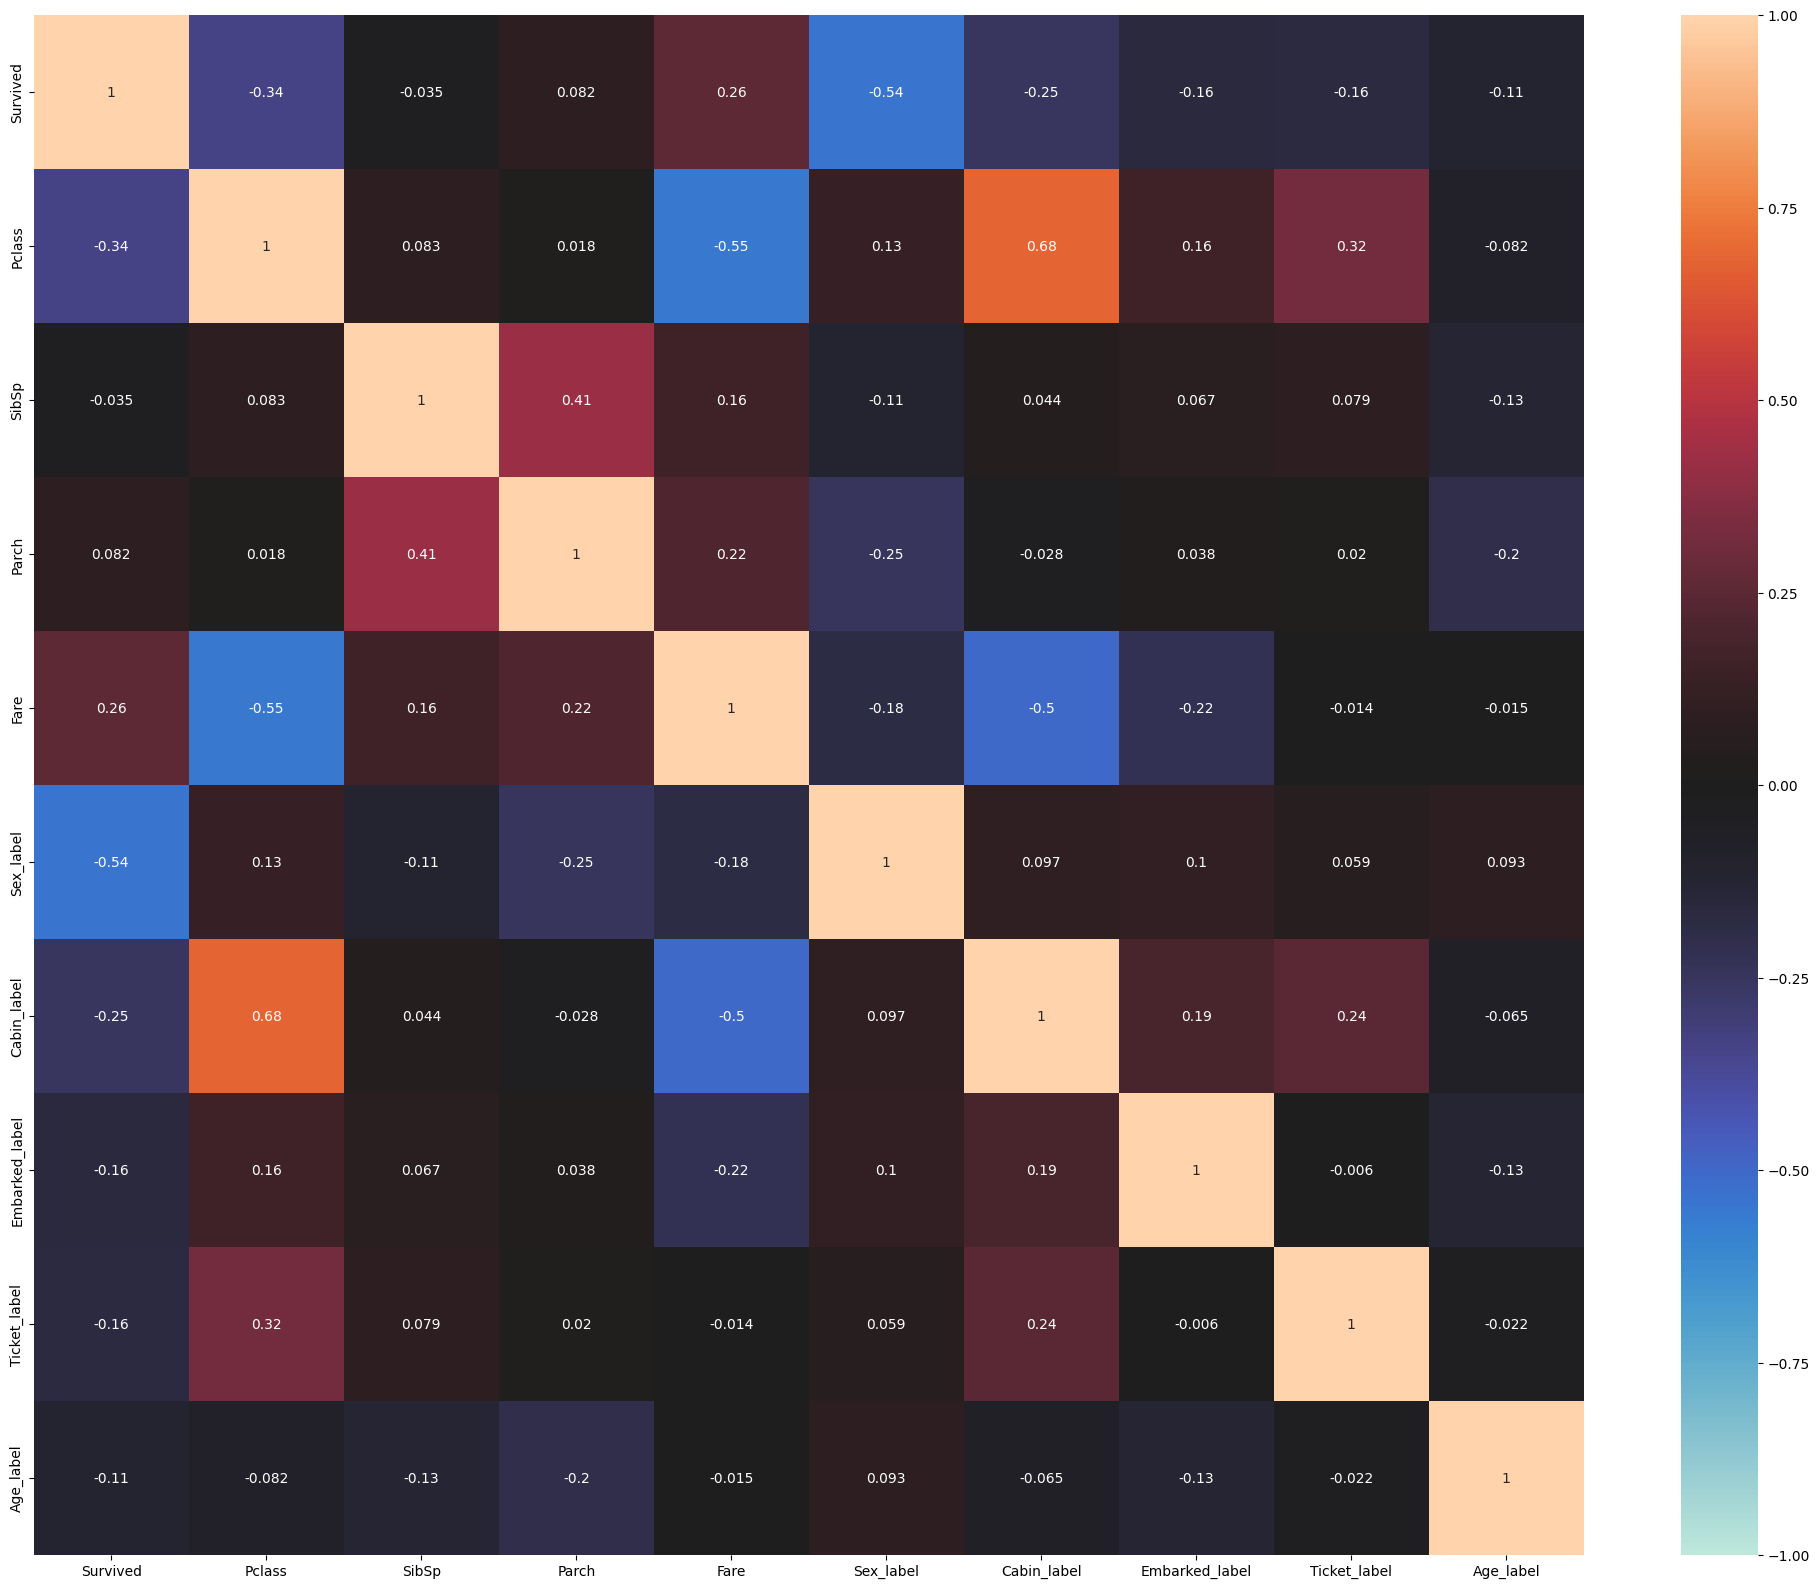

In [133]:
correlation = df.corr()
plt.figure(figsize = [25, 20])
sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, center = 0)
plt.show()

## Sample Submission File

In [134]:

df

,Survived,Pclass,SibSp,Parch,Fare,Sex_label,Cabin_label,Embarked_label,Ticket_label,Age_label
0,0,3,1,0,7.2500,1,147,2,523,28
1,1,1,1,0,71.2833,0,81,0,596,51
2,1,3,0,0,7.9250,0,147,2,669,34
3,1,1,1,0,53.1000,0,55,2,49,47
4,0,3,0,0,8.0500,1,147,2,472,47
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,147,2,101,35
887,1,1,0,0,30.0000,0,30,2,14,24
888,0,3,1,2,23.4500,0,147,2,675,88
889,1,1,0,0,30.0000,1,60,0,8,34


In [135]:
dt

,Pclass,SibSp,Parch,Fare,Sex_label,Cabin_label,Embarked_label,Ticket_label,Age_label
0,3,0,0,7.8292,1,76,1,152,44
1,3,1,0,7.0000,0,76,2,221,60
2,2,0,0,9.6875,1,76,1,73,74
3,3,0,0,8.6625,1,76,2,147,34
4,3,1,1,12.2875,0,76,2,138,27
...,...,...,...,...,...,...,...,...,...
413,3,0,0,8.0500,1,76,2,267,79
414,1,0,0,108.9000,0,22,0,324,51
415,3,0,0,7.2500,1,76,2,346,50
416,3,0,0,8.0500,1,76,2,220,79


In [136]:
# import warnings

# from sklearn.discriminant_analysis import StandardScaler

# # Ignore all FutureWarning messages
# warnings.filterwarnings("ignore", category=FutureWarning)
# import itertools
# columns = df.columns
# result = []
# for r in range(1,len(columns) + 1):
#     for subset in itertools.combinations(columns, r):
#         result.append(subset)
# result = [list(comb) for comb in result]
# i = 0
# max_model_score = 0
# scaler = StandardScaler()

# for rs in result:
#     if rs and 'Survived' not in rs:
#         rs.append('Survived')
#         X = df.drop(rs, axis=1)
#         y = df['Survived']
#         x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.34, stratify=y, random_state=41)
        
#         # Apply scaling
#         x_train_scaled = scaler.fit_transform(x_train)
#         x_test_scaled = scaler.transform(x_test)

#         # Increase max_iter to avoid convergence issue
#         model = LogisticRegression(random_state=0, max_iter=10000)
#         model.fit(x_train_scaled, y_train)
#         y_pred = model.predict(x_test_scaled)
        
#         ms = model.score(x_test_scaled, y_test)
#         if (ms > max_model_score):
#             print(rs, " AND  ", ms)
#             max_model_score = ms



In [137]:
aou = ['Pclass', 'Parch', 'Fare']

toDropFinal = [
    'Survived',
] + aou

x = df.drop(toDropFinal, axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.34, stratify=y, random_state=41)
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
# print()
print(cross_val_score(model, x, y, cv=5).mean())
y_predicted = model.predict(x_test)
print(model.score(x_test, y_test))

sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)
id = sf.pop('PassengerId')
y_pred = model.predict(dt.drop(aou, axis=1))

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('./logreg/submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

/home/ubuntu-rainn/miniconda3/envs/com222/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7833783190006904
0.8646864686468647
Submission file created: submission_file.csv


## Generate Results